In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../src/')

In [11]:
from modelling.sgd import SGD_optimizer
from data.create_dataset import *
from visualization.visualize import *
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
X, z = create_dataset('../data/raw/SRTM_data_Norway_1.tif',degree=8)
X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
Xscaler = StandardScaler().fit(X_train)
zscaler = StandardScaler().fit(z_train)

X_train = Xscaler.transform(X_train)
z_train = zscaler.transform(z_train)
X_train.shape

(8000, 45)

In [19]:
sgd = SGD_optimizer(n_epochs=1000)
sgd.fit(X_train,z_train)
sgd.score(X_test,z_test)

1685037.3257554127

<Axes3DSubplot:title={'center':'SGD'}, xlabel='X', ylabel='Y'>

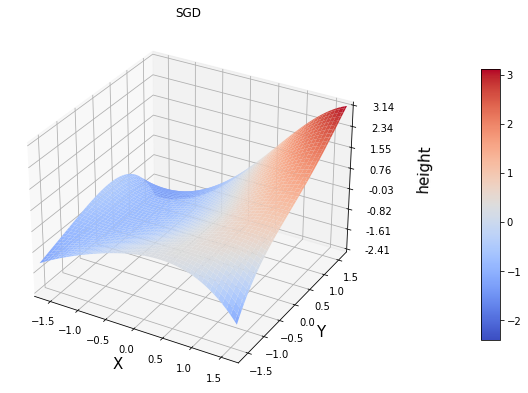

In [20]:
plot_surf_from_X(X_train, sgd.predict(X_train),'SGD')

In [22]:
a= 1
print(property(a))

In [39]:
from modelling.linreg import SGD_linreg

<Axes3DSubplot:title={'center':'SGD'}, xlabel='X', ylabel='Y'>

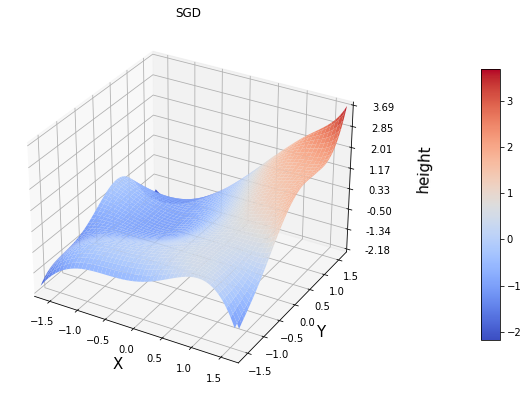

In [59]:
sgd2 = SGD_linreg(n_epochs=100000,regularization=None)
sgd2.fit(X_train,z_train)
plot_surf_from_X(X_train, sgd2.predict(X_train),'SGD')

../src\visualization\visualize.py:42: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(xi, yi, zi, cmap=cm.coolwarm,


<Axes3DSubplot:title={'center':'SGD'}, xlabel='X', ylabel='Y'>

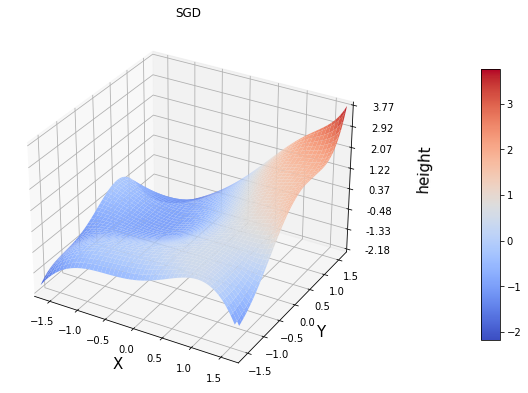

In [58]:
from sklearn.linear_model import SGDRegressor
sgd_sk = SGDRegressor(fit_intercept=False,eta0=0.05,max_iter = 100000, tol = None,penalty = None)
sgd_sk.fit(X_train,z_train.ravel())
plot_surf_from_X(X_train, sgd_sk.predict(X_train),'SGD')

<Axes3DSubplot:title={'center':'SGD'}, xlabel='X', ylabel='Y'>

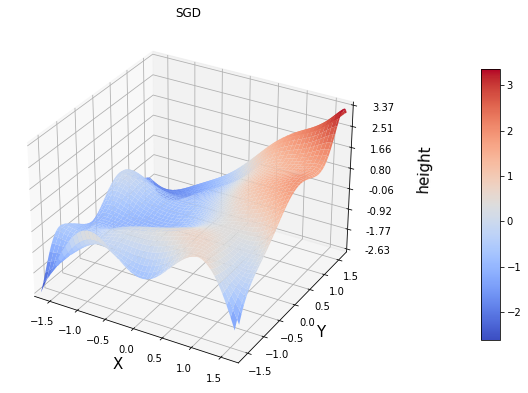

In [56]:
from modelling import ols
beta = ols.fit_beta(X_train,z_train,fit_intercept=0)
z_pred = X_train @ beta
plot_surf_from_X(X_train, z_pred,'SGD')

In [64]:
X, z = create_dataset('../data/raw/SRTM_data_Norway_1.tif',degree=2)
X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
Xscaler = StandardScaler().fit(X_train)
zscaler = StandardScaler().fit(z_train)

#X_train = Xscaler.transform(X_train)
#z_train = zscaler.transform(z_train)
print(X_train.shape)

from sklearn.linear_model import LinearRegression
linreg_sk = LinearRegression(fit_intercept=False).fit(X_train,z_train)
print(linreg_sk.intercept_)
print(linreg_sk.coef_)

(8000, 6)
0.0
[[1279.63612137  -55.07307883 -118.49075748   87.68100688  314.93669726
   -13.12190843]]


In [79]:
from modelling.linreg import LinReg
linreg = LinReg(fit_intercept=True, regularization = None).fit(X_train,z_train)
print(linreg.intercept)
print(linreg.beta)

[1279.63612137]
[[   0.        ]
 [ -55.07307883]
 [-118.49075748]
 [  87.68100688]
 [ 314.93669726]
 [ -13.12190843]]


In [78]:
from sklearn.linear_model import Ridge
ridge_sk = Ridge(fit_intercept=True,alpha=0.001).fit(X_train,z_train)
print(ridge_sk.intercept_)
print(ridge_sk.coef_)

[1279.63339169]
[[   0.          -55.06653492 -118.48483994   87.67798249  314.92979151
   -13.12418193]]


In [80]:
ridge = LinReg(fit_intercept=True, regularization = 'l2').fit(X_train,z_train)
print(ridge.intercept)
print(ridge.beta)

[1279.63339169]
[[   0.        ]
 [ -55.06653492]
 [-118.48483994]
 [  87.67798249]
 [ 314.92979151]
 [ -13.12418193]]


In [82]:
from modelling.nn_backup import NeuralNetwork
X, z = create_dataset('../data/raw/SRTM_data_Norway_1.tif')
X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
Xscaler = StandardScaler().fit(X_train)
zscaler = StandardScaler().fit(z_train)

X_train = Xscaler.transform(X_train)
z_train = zscaler.transform(z_train)

<Axes3DSubplot:title={'center':'NN prediction'}, xlabel='X', ylabel='Y'>

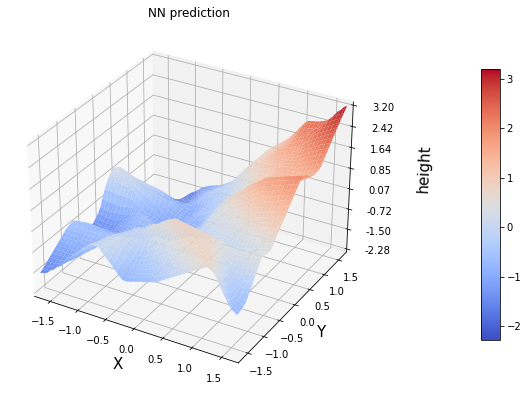

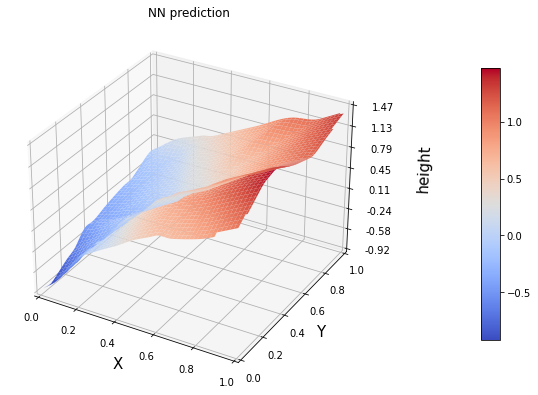

In [125]:
from modelling.nn import NeuralNetwork
nn = NeuralNetwork(hidden_activation = 'relu',momentum = 0.5,w_init='glorot',n_epochs = 1000)
nn.fit(X_train,z_train)
plot_surf_from_X(X_train,nn.predict(X_train),'NN prediction')
plot_surf_from_X(X_test,nn.predict(X_test),'NN prediction')